In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline


In [2]:
#import the model
from sklearn import linear_model
#import evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
import sklearn

# 01 - Problem (case study)
Familiarise yourself with Data Descriptions and the Goal.

Our objective

Given a predictor variable X and a response variable y, we fit a straight line to this data that minimizes the distance—most commonly the average squared distance—between the sample points and the fitted line. We can now use the intercept and slope learned from this data to predict the outcome variable of new data

# 02 Getting Data

In [4]:
# Read the .csv file into python

data = pd.read_csv('/Users/Lenovo/Desktop/marketing_customer_analysis.csv')

# 03 - Cleaning/Wrangling/EDA
Change headers names. Deal with NaN values, replace with appropriate method.






In [5]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [6]:
# lets make all the columns into lower case and replace whitespace
cols = []
for i in range(len(data.columns)):
    cols.append(data.columns[i].lower())


In [7]:
def standardize_col(col):
    return col.lower().replace(" ", "_")

In [8]:
for col in data.columns.to_list():
    print(standardize_col(col))

customer
state
customer_lifetime_value
response
coverage
education
effective_to_date
employmentstatus
gender
income
location_code
marital_status
monthly_premium_auto
months_since_last_claim
months_since_policy_inception
number_of_open_complaints
number_of_policies
policy_type
policy
renew_offer_type
sales_channel
total_claim_amount
vehicle_class
vehicle_size


In [9]:
stdzd_cols = []
for col in data.columns.to_list():
    stdzd_cols.append(standardize_col(col))

In [10]:
data.columns = stdzd_cols

In [11]:
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

In [13]:
# there are no NaN values in our dataset, so no need to replace them. 

In [14]:
#split categorical Features and Numerical Features.

X_num = data.select_dtypes(include = np.number)
X_cat = data.select_dtypes(include = np.object)

In [15]:
# Explore visually both sets of features, to identify next steps.

In [16]:
X_num.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [17]:
X_cat.head()

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


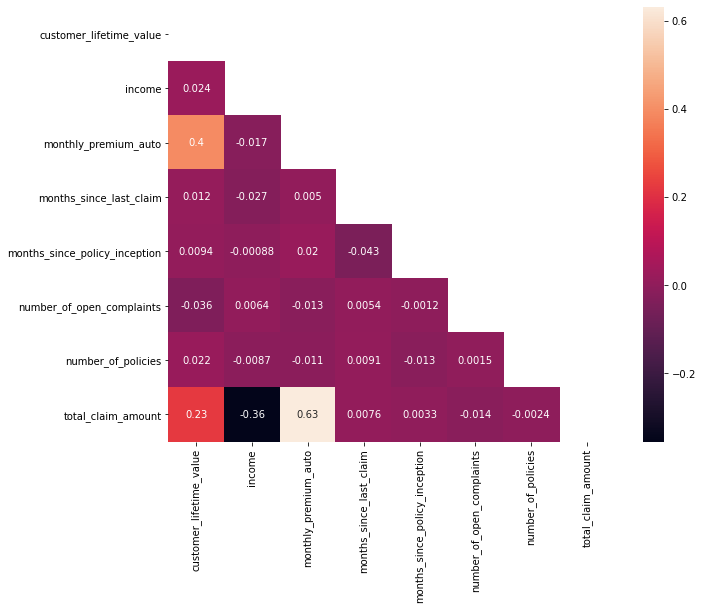

In [18]:
# Lets check for potential multicollinearity using a correlation matrix.

correlations_matrix = data.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [19]:
# No strong positive correlation among columns, so there is no multicollinearity problem in our dataset.  


# 04 - Pre-Processing Data
 


In [20]:
# Dealing with outliers. lets check for outliers in our numerical dataset

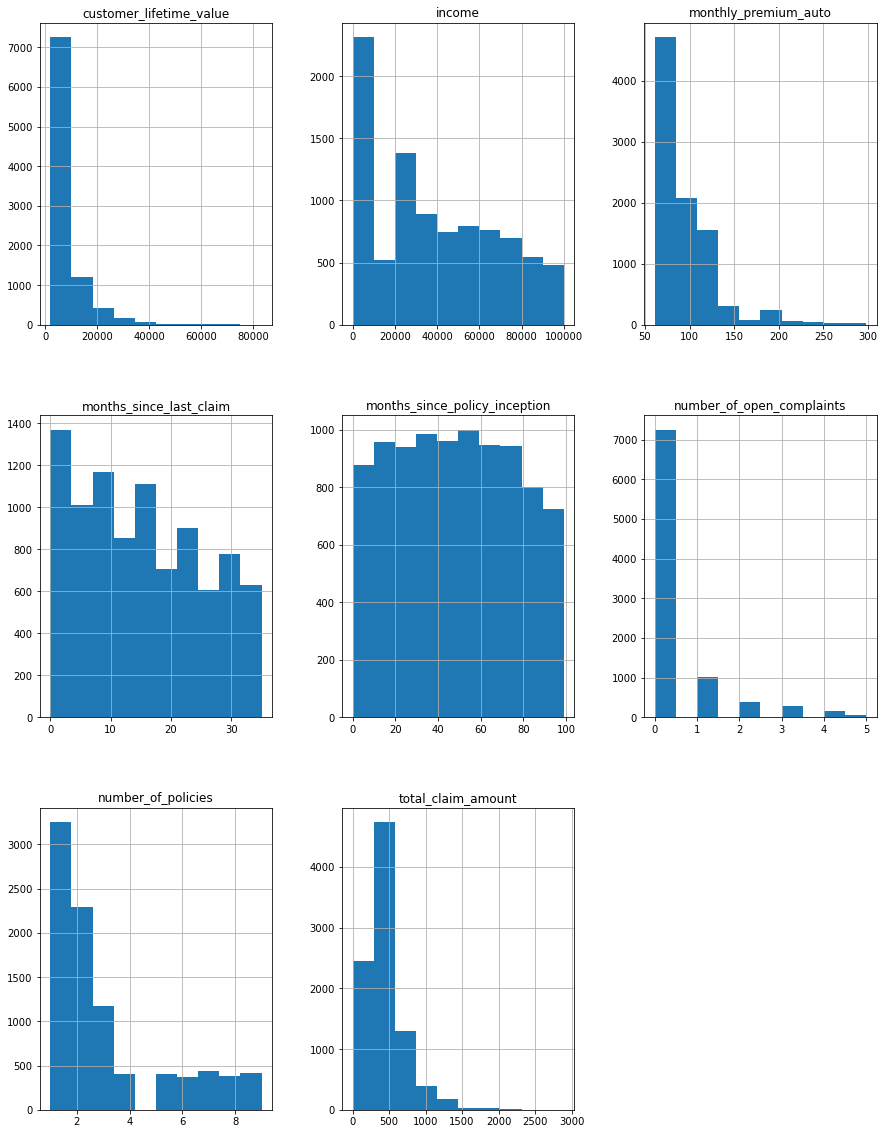

In [21]:
data.hist(figsize = (15,20));


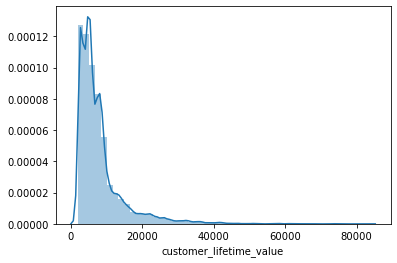

In [22]:
sns.distplot(data['customer_lifetime_value'])
plt.show()

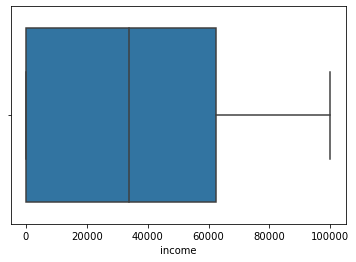

In [23]:
sns.boxplot(x=data['income'])
plt.show()

In [24]:
#we can remove outliers using calculated IQRs 

iqr = np.percentile(data['customer_lifetime_value'],75) - np.percentile(data['customer_lifetime_value'],25)
upper_limit = np.percentile(data['customer_lifetime_value'],75) + 1.5*iqr
lower_limit = np.percentile(data['customer_lifetime_value'],25) - 1.5*iqr


In [25]:
# repeating the same for 'income' column

In [26]:
iqr = np.percentile(data['income'],75) - np.percentile(data['income'],25)
upper_limit = np.percentile(data['income'],75) + 1.5*iqr
lower_limit = np.percentile(data['income'],25) - 1.5*iqr


In [27]:
# data = data[(data['customer_lifetime_value']>lower_limit) & (data['customer_lifetime_value']<upper_limit)]

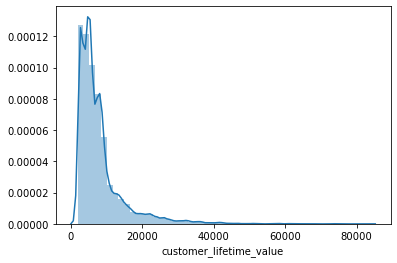

In [28]:
sns.distplot(data['customer_lifetime_value'])
plt.show()

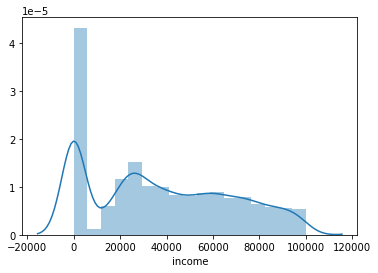

In [29]:
sns.distplot(data['income'])
plt.show()

In [30]:
# we can see that both colums are skewed, so we can rescale them using logarithmic method 

In [31]:
def log_transfom_clean_(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN 
data["clv_log"] = list(map(log_transfom_clean_, data["customer_lifetime_value"]))

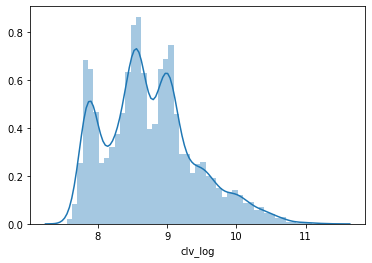

In [32]:
sns.distplot(data["clv_log"])
plt.show()

In [33]:
# it looks good, we can repeat the same for 'income' column 

In [34]:
np.seterr(divide = 'ignore') 


{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [35]:
def log_transfom_clean_(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN 
data["income_log"] = list(map(log_transfom_clean_, data["income"]))

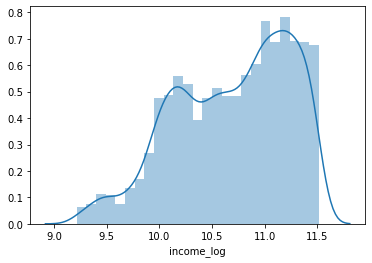

In [36]:
sns.distplot(data['income_log'])
plt.show()

In [37]:
np.seterr(divide = 'warn') 


{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [38]:
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,clv_log,income_log
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,7.924260,10.937988
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,8.850738,NaN
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,9.464008,10.794809
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,8.941920,NaN
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,7.942253,10.688211


In [39]:
# there are some NaN values in new 'income_log', lets replace them 

data["income_log"] = data["income_log"].fillna(np.mean(data["income_log"]))

In [40]:
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,clv_log,income_log
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,7.924260,10.937988
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,8.850738,10.694229
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,9.464008,10.794809
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,8.941920,10.694229
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,7.942253,10.688211


In [41]:
# looks good! now we can remove the original 'customer_lifetime_value' and 'income' columns

data = data.drop(['customer_lifetime_value','income', 'customer'], axis=1)


In [42]:
data.head()

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,monthly_premium_auto,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,clv_log,income_log
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,69,...,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,7.924260,10.937988
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,94,...,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,8.850738,10.694229
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,108,...,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,9.464008,10.794809
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,106,...,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,8.941920,10.694229
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,73,...,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,7.942253,10.688211


In [43]:
# Normalization - ie use chosen scaler to transform selected columns into normal distribution as needed for linear regression model. 
# Propose: MinMax scaler on 'effective_to_date' and standard scaler on numerical columns.

In [44]:
data.dtypes

state                             object
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
clv_log                          float64
income_log                       float64
dtype: object

In [45]:
from sklearn.preprocessing import MinMaxScaler
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'], errors='coerce')

In [46]:
data['effective_to_date']=MinMaxScaler().fit_transform(data['effective_to_date'].values.reshape(-1, 1))

In [47]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(X_num)
x_standardized = transformer.transform(X_num)
print(x_standardized.shape)


(9134, 8)


In [48]:
# Encoding Categorical Data fields using OHE.

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(X_cat)
encoded = encoder.transform(X_cat).toarray()
encoded


array([[0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [49]:
X_cat

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [50]:
# Bring categorical and numerical columns back together using pd.concat.

X = pd.concat([X_num, X_cat])
X = data.reset_index(drop=True)

In [51]:
# Define X and y, the y value you are seeking to predict is claim amount.

y = data['total_claim_amount']
X = data.drop(['total_claim_amount'], axis=1)


In [52]:
X_cat.shape

(9134, 16)

In [53]:
y.shape

(9134,)

In [54]:
# Splitting into train set and test dataset using random state, eg 80%:20% .

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=80)

In [57]:
# 05 - Modeling. Apply linear regression model from sklearn.linear_model.
# Fit over your train data and predict against X test.



In [58]:
lm = linear_model.LinearRegression()

In [59]:
model = lm.fit(X,y)
lm.score(X,y)

ValueError: could not convert string to float: 'Washington'

In [ ]:
predictions  = lm.predict(X)
predictions

In [ ]:
mean_squared_error(y, predictions)

In [ ]:
# 06 - Model Validation
You should gather appropriate metrics to evaluate model accuracy over y_test- such as : R2. MSE. RMSE. MAE.



In [ ]:
r2_score(y, predictions)

07 - Reporting
Present results inside your notebook with appropriate annotation describing the accuracy of the model and business insight gained.